In [168]:
from IPython.display import HTML

HTML('''
    <script>
        code_show=true; 
        function code_toggle() {
            if (code_show){
                $('div.input').hide();
                $('button#code-toggle').text('Show Code');
            } else {
                $('div.input').show();
                $('button#code-toggle').text('Hide Code');
            }
            code_show = !code_show
        }
    </script>

    <button id="code-toggle" onclick="javascript:code_toggle()">
        Hide Code
    </button>
''')

# Mass Shootings in the US Over the Last 50 Years
**Capstone Report & Research Proposal by Esther Weon**

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

# Overview

This report will explore mass shootings that took place in the United States over the last 50 years (1966-2017). The dataset contains detailed information of 398 mass shootings in the United States of America that killed 1996 and injured 2488 people; it was sourced from public datasets and web pages (e.g. Wikipedia, Stanford, USA Today, etc.).

I found this dataset interesting, because many people fear that "Big Data" will open the door for data scientists to wield statistics and facts to incorrectly reinforce preexisting biases in our society. A dataset that combines race and crime data in particular, especially on an issue as charged as mass shootings, seems ripe for misinterpreting if handled irresponsibly. I chose to work with this data, because I wanted practice making sound, focused, and defensible conclusions about complex data.

More information about the dataset, as well as its previous iterations, can be found on its [Kaggle page](https://www.kaggle.com/zusmani/us-mass-shootings-last-50-years/data).


# Dataset Details

This dataset contains the following attributes:

- **S#**: unique ID for the shooting in the dataset
- **Title**: name given to the shooting
- **Location**: city and state that the shooting took place
- **Date**: date of the shooting
- **Incident Area**: specific area of the shooting
- **Open/Close Location**: whether the shooting happened in an open or closed space
- **Target**: people targeted by the shooter
- **Cause**: shooter's rationale for the shooting
- **Summary**: description of the shooting
- **Fatalities**: # of people the shooter killed (including himself/herself, if suicide shooting)
- **Injured**: # of people the shooter injured
- **Total victims**: # of people the shooter killed or injured
- **Policeman Killed**: # of police officers killed by shooter
- **Age**: age of the shooter(s)
- **Employeed (Y/N)**: whether shooter was employed or not
- **Employed at**: place of employment for shooter
- **Mental Health Issues**: whether shooter had mental health issues
- **Race**: race of the shooter
- **Gender**: gender of the shooter(s)
- **Latitude**: latitude coordinate for shooting
- **Longitude**: longitude coordinate for shooting

Below is an excerpt of the raw data.

In [170]:
df = pd.read_csv('mass_shootings_v_5.csv', encoding = "ISO-8859-1")
df.head()

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,...,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Texas church mass shooting,"Sutherland Springs, TX",11/5/2017,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,...,46,0.0,26,NaN,NaN,No,White,M,NaN,NaN
1,2,Walmart shooting in suburban Denver,"Thornton, CO",11/1/2017,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,...,3,0.0,47,NaN,NaN,No,White,M,NaN,NaN
2,3,Edgewood businees park shooting,"Edgewood, MD",10/18/2017,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three pe...",3,...,6,0.0,37,NaN,Advance Granite Store,No,Black,M,NaN,NaN
3,4,Las Vegas Strip mass shooting,"Las Vegas, NV",10/1/2017,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,...,585,1.0,64,NaN,NaN,Unclear,White,M,36.181271,-115.134132
4,5,San Francisco UPS shooting,"San Francisco, CA",6/14/2017,UPS facility,Close,coworkers,NaN,"Jimmy Lam, 38, fatally shot three coworkers an...",3,...,5,0.0,38,1.0,NaN,Yes,Asian,M,NaN,NaN


# Preliminary Exploration & Summary Statistics

I focused on 4 main attributes – the shooter's age, race, employment status, and gender (columns **Age**, **Race**, **Employeed (Y/N)**, and **Gender**, respectively) – for my preliminary exploration of the data.

## Age

The raw `Age` data contained `NaN` values, as well as instances of 2 comma-separated `Age` values (to account for 2-person shootings). I dropped all `NaN` values and parsed all remaining `Age` values to get all individual shooters' ages.

### ***The mean age of mass shooters was 31.36 years old; the median was 30 years old. ***

### ***The youngest was 11 years old; the oldest 70 years old. ***

### ***The distribution of the shooters' ages was most heavily concentrated around the late teens to early 20s, followed by the early to mid 40s. ***

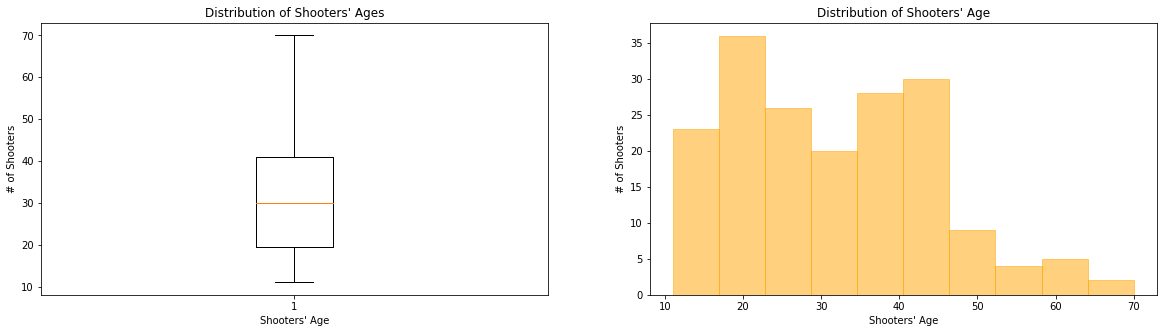

In [171]:
# Drop NaNs
ages_without_nans = df[pd.notnull(df['Age'])]

def get_age(age):
    return ['nan' if each_age == 'nan' else int(each_age) for each_age in str(age).split(',')]

age_col = ages_without_nans['Age'].apply(get_age)
all_non_null_ages = np.concatenate(age_col.values.tolist())
all_non_null_ages = np.array(list(filter(lambda x: x > 0, all_non_null_ages)))

# Age Mean & Median
age_mean = all_non_null_ages.mean()
age_median = np.median(all_non_null_ages)
min_age = all_non_null_ages.min()
max_age = all_non_null_ages.max()

# Show Box Plot
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.title('Distribution of Shooters\' Ages')
plt.xlabel('Shooters\' Age')
plt.ylabel('# of Shooters')
plt.boxplot(all_non_null_ages)

plt.subplot(1, 2, 2)
plt.title('Distribution of Shooters\' Age')
plt.xlabel('Shooters\' Age')
plt.ylabel('# of Shooters')
plt.hist(all_non_null_ages, edgecolor = 'orange', linewidth = 1, color = 'orange', alpha = 0.5)
plt.show()

## Race

The raw `Race` data had inconsistent labeling for the various categories – my first step was to make these labels consistent and to remove any rows where the race was 'Unknown' or 'Biracial' (as these categories did not provide any meaningful insight).

### ***White shooters outnumber every other race of shooters. They are close to double the number of black shooters, the next largest group.***

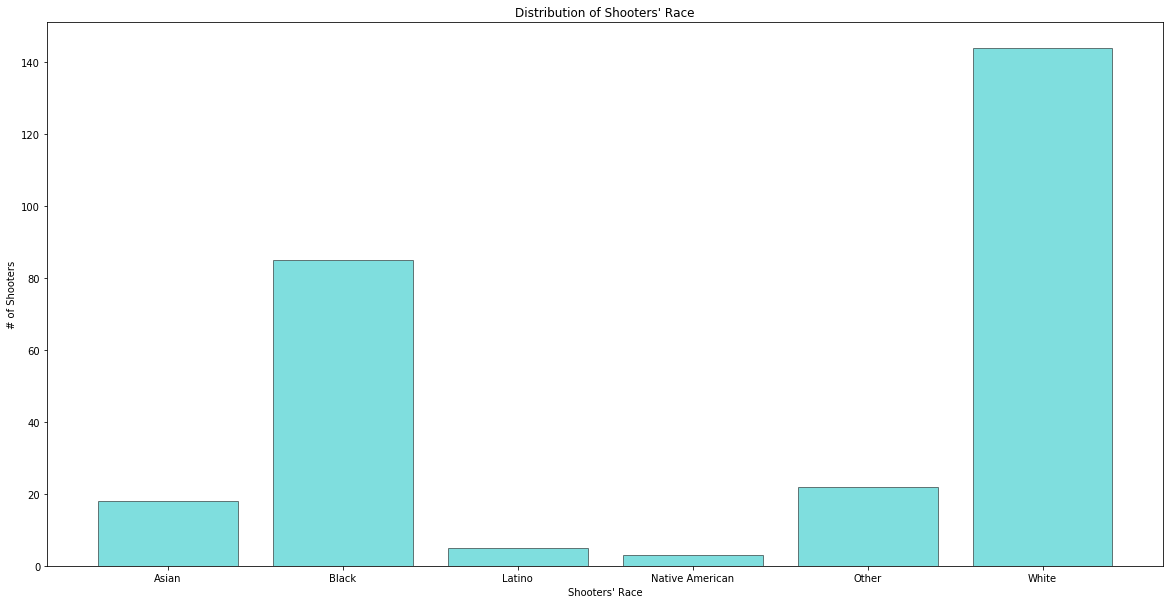

In [172]:
# Make labels consistent
df = df.replace({'Race': {
    'Asian American': 'Asian',
    'Asian American/Some other race': 'Asian',
    'Black American or African American': 'Black',
    'Black American or African American/Unknown': 'Black',
    'Native American or Alaska Native': 'Native American',
    'Some other race': 'Other',
    'Two or more races': 'Biracial',
    'White American or European American': 'White',
    'White American or European American/Some other Race': 'White',
    'black': 'Black',
    'white': 'White'
}})

# Drop NaNs
races_without_nans = df[pd.notnull(df['Race'])]

# Remove 'Unknown's and 'Biracial's
races_without_nans = races_without_nans[races_without_nans['Race'] != 'Unknown']
races_without_nans = races_without_nans[races_without_nans['Race'] != 'Biracial']

# Group remaining labels by count
race_breakdown = races_without_nans.groupby('Race').count()
unique_races = races_without_nans['Race'].unique()
race_values = [race_breakdown['S#'][x] for x in unique_races]

# Show Bar Graph
plt.figure(figsize=(20,10))
plt.title('Distribution of Shooters\' Race')
plt.xlabel('Shooters\' Race')
plt.ylabel('# of Shooters')
plt.bar(unique_races, race_values, edgecolor = 'black', linewidth = 1, color = 'c', alpha = 0.5)
plt.show()

## Employment

### ***Of the shooters whose employment statuses were available, close twice as many shooters are employed vs. unemployed.***

### ***Although there are much fewer unemployed shooters than employed shooters, considering that the ratio of unemployed to employed citizens in US is much less than 1:2, it seems like unemployment is more prevalent among shooters vs. average citizens.***

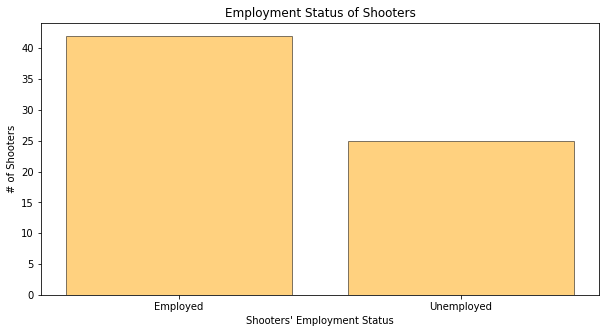

In [173]:
employments_without_nans = df[pd.notnull(df['Employeed (Y/N)'])]

unique_employed_answers = employments_without_nans['Employeed (Y/N)'].unique()
employment_breakdown = employments_without_nans.groupby('Employeed (Y/N)').count()
employment_levels = [employment_breakdown['S#'][x] for x in unique_employed_answers]

plt.figure(figsize=(10,5))
plt.title('Employment Status of Shooters')
plt.xlabel('Shooters\' Employment Status')
plt.ylabel('# of Shooters')
plt.bar(['Employed', 'Unemployed'], employment_levels, edgecolor = 'black', linewidth = 1, color='orange', alpha=0.5)
plt.show()

## Gender

The raw `Gender` data needed to be modified to have consistent labeling ('M', 'F', 'M/F', and 'Unknown'). From there, we removed all 'M/F' and 'Unknown' values to target the remaining male and female records.

### ***The number of male shooters is over 58 times the number of female shooters.***

[292, 5]


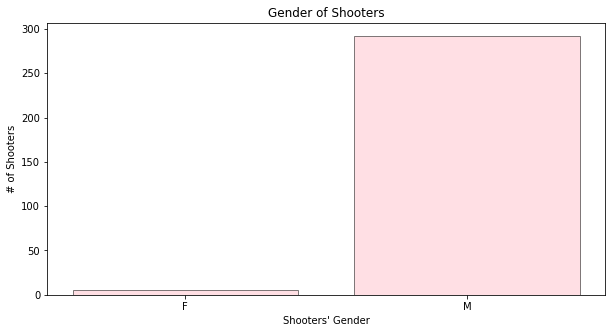

In [174]:
df = df.replace({"Gender": {
    'Female': 'F',
    'Male': 'M',
    'Male/Female': 'M/F'
}})
cleaned_genders = df[df['Gender'] != 'M/F']
cleaned_genders = cleaned_genders[cleaned_genders['Gender'] != 'Unknown']

# Could count M/Fs (add one to each category, male and female – esp. if there are a significant # of M/Fs)

unique_genders = cleaned_genders['Gender'].unique()
gender_breakdown = cleaned_genders.groupby('Gender').count()
gender_levels = [gender_breakdown['S#'][x] for x in unique_genders]

print(gender_levels)

plt.figure(figsize=(10, 5))
plt.title('Gender of Shooters')
plt.xlabel('Shooters\' Gender')
plt.ylabel('# of Shooters')
plt.bar(unique_genders, gender_levels, edgecolor = 'black', linewidth = 1, color="pink", alpha=0.5)
plt.show()

# Asking Questions

## Which state has experienced the highest number of mass shootings?

### ***The data shows that shootings most often happen California, followed by a distant second (Florida) and third (Texas).***

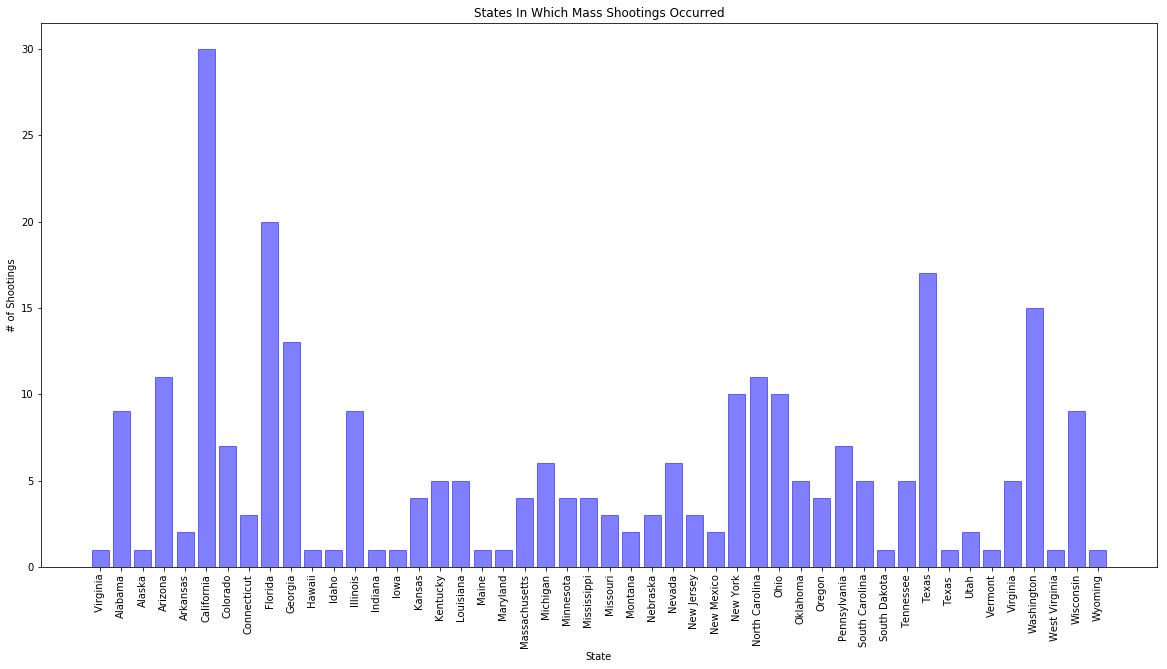

In [175]:
locations_without_nans = df[pd.notnull(df['Location'])]
locations_without_nans = locations_without_nans[locations_without_nans['Location'].apply(lambda x: len(x.split(', ')) == 2)]
locations_without_nans['Location'] = locations_without_nans['Location'].apply(lambda x: x.split(', ')[1])

# find the one that is length 3 and length 1

locations_without_nans = locations_without_nans.replace({'Location': {
    'TX': 'Texas',
    'CO': 'Colorado',
    'MD': 'Maryland',
    'NV': 'Nevada',
    'CA': 'California',
    'PA': 'Pennsylvania',
    'WA': 'Washington', 
    'LA': 'Louisiana'
}})
unique_locations = locations_without_nans['Location'].unique()
location_breakdown = locations_without_nans.groupby('Location').count()
location_levels = [location_breakdown['S#'][x] for x in unique_locations]

plt.figure(figsize=(20, 10))
plt.title('States In Which Mass Shootings Occurred')
plt.xlabel('State')
plt.ylabel('# of Shootings')
plt.xticks(rotation=90)
plt.bar(unique_locations, location_levels, edgecolor = 'blue', linewidth = 1, color = 'blue', alpha = 0.5)
plt.show()

## How many victims and fatalities are there per mass shooting?

### ***Each mass shooting had an average of 4.43 fatalities and 10.26 victims.***

### ***The highest fatality count in the dataset was 59; the highest victim count was a staggering 585. This last number was a significant outlier, and so was removed from the chart below. ***

### ***The distribution of fatality and victim counts is most heavily concentrated around 0 to 10, and drops off dramatically afterwards.***

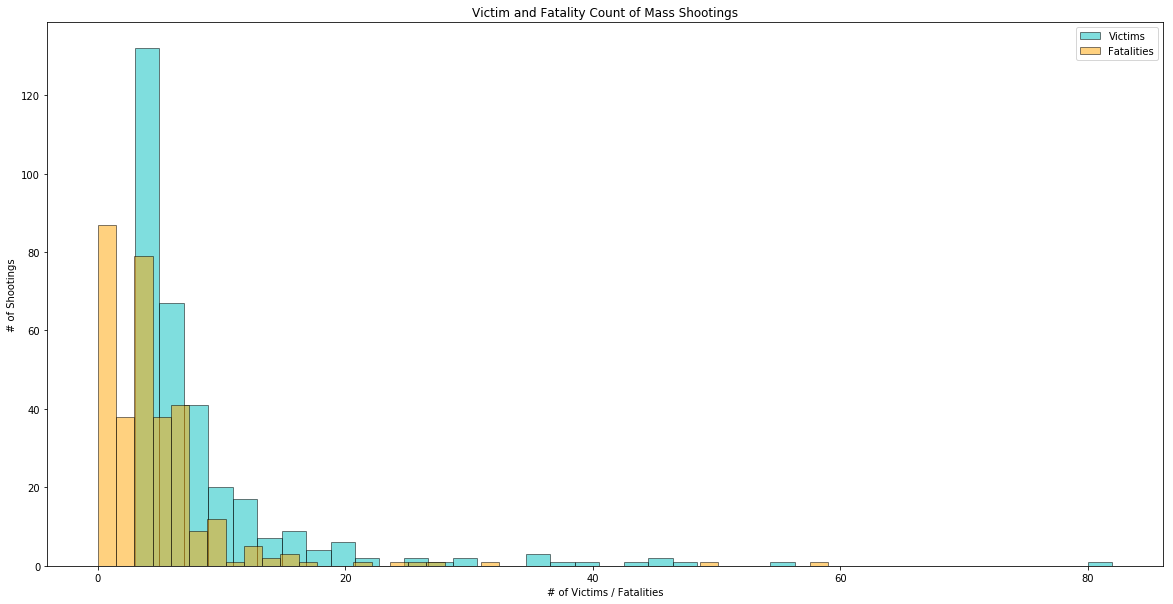

In [180]:
df_with_all_non_null_fatalities = df[pd.notnull(df['Fatalities'])]
all_non_null_fatalities = df_with_all_non_null_fatalities['Fatalities']
all_non_null_victims = df_with_all_non_null_fatalities[pd.notnull(df_with_all_non_null_fatalities['Total victims'])]
all_non_null_fatalities_or_victims = all_non_null_victims['Total victims']

fatalities_mean = all_non_null_fatalities.mean()
fatalities_median = np.median(all_non_null_fatalities)
fatalities_min = all_non_null_fatalities.min()
fatalities_max = all_non_null_fatalities.max()

victims_mean = all_non_null_fatalities_or_victims.mean()
victims_median = np.median(all_non_null_fatalities_or_victims)
victims_min = all_non_null_fatalities_or_victims.min()
victims_max = all_non_null_fatalities_or_victims.max()

plt.figure(figsize=(20,10))
plt.title('Victim and Fatality Count of Mass Shootings')
plt.xlabel('# of Victims / Fatalities')
plt.ylabel('# of Shootings')
plt.hist(np.array(list(filter(lambda x: x < 100, all_non_null_fatalities_or_victims))), bins = 40, edgecolor = 'black', linewidth = 1, color = 'c', alpha = 0.5, label = 'Victims')
plt.hist(all_non_null_fatalities, bins = 40, edgecolor = 'black', linewidth = 1, color = 'orange', alpha = 0.5, label = 'Fatalities')
plt.legend()
plt.show()

## Is there a correlation between a shooter's age SCATTER PLOT - AGE VS FATALITY COUNT / victim count
T - TEST (T VALUE VS P VALUE)

## What are the causes of mass shootings perpetrated by mentally ill shooters vs. by those who are not mentally ill?

### ***The data shows that mentally ill shooters are more motivated by extremist ideology and incidents of mental incapacitation.***

### ***Not mentally ill shooters were more likely to commit a shooting due to anger.***

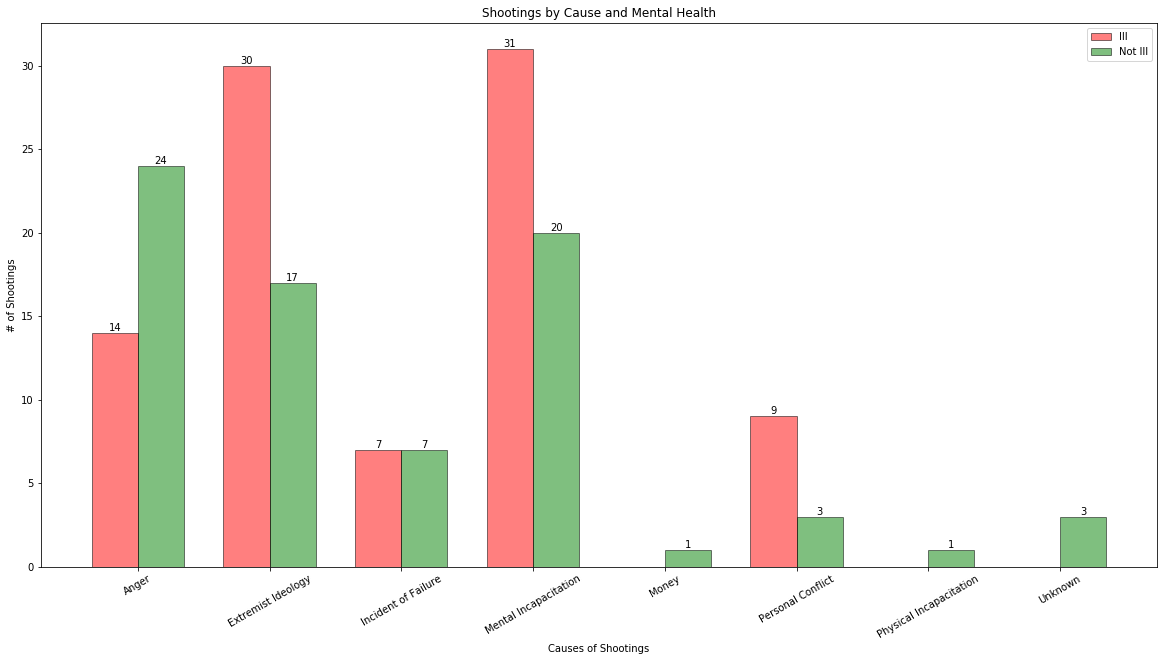

In [177]:
df = df.replace({"Cause": {
    'unknown': 'Unknown',
    
    'unemployement': 'Incident of Failure',
    'failing exams': 'Incident of Failure',
    'suspension': 'Incident of Failure',
    'breakup': 'Incident of Failure',
    
    'terrorism': 'Extremist Ideology',
    'religious radicalism': 'Extremist Ideology',
    'racism': 'Extremist Ideology',
    
    'domestic dispute': 'Personal Conflict',
    'domestic disputer': 'Personal Conflict',
    'revenge': 'Personal Conflict',
    
    'anger': 'Anger',
    'frustration': 'Anger',
    
    'drunk': 'Physical Incapacitation',
    
    'psycho': 'Mental Incapacitation',
    
    'robbery': 'Money'
}})

df = df.replace({"Mental Health Issues": {
    'Unclear': 'Unknown',
    'unknown': 'Unknown'
}})

no_null_causes = df[pd.notnull(df['Cause'])]
no_null_mentals_or_causes = no_null_causes[pd.notnull(no_null_causes['Mental Health Issues'])]

unique_mentals = no_null_mentals_or_causes['Mental Health Issues'].unique()
mental_breakdown = no_null_mentals_or_causes.groupby('Mental Health Issues').count()

ill = no_null_mentals_or_causes[no_null_mentals_or_causes['Mental Health Issues'] == 'Yes']
ill_unique_causes = ill['Cause'].unique()
ill_cause_breakdown = ill.groupby('Cause').count()

not_ill = no_null_mentals_or_causes[no_null_mentals_or_causes['Mental Health Issues'] == 'No']
not_ill_unique_causes = not_ill['Cause'].unique()
not_ill_cause_breakdown = not_ill.groupby('Cause').count()

all_causes = np.unique(np.concatenate((ill_unique_causes, not_ill_unique_causes), axis=0))

def get_val(x, breakdown):
    return breakdown['Mental Health Issues'][x] if x in breakdown['Mental Health Issues'] else 0

fig, ax = plt.subplots(figsize=(20,10))
ind = np.arange(len(all_causes))
width = 0.35

ill_vals = [get_val(x, ill_cause_breakdown) for x in all_causes]
ill_rects = ax.bar(ind, ill_vals, width, edgecolor = 'black', linewidth = 1, color='r', alpha = 0.5)

not_ill_vals = [get_val(x, not_ill_cause_breakdown) for x in all_causes]
not_ill_rects = ax.bar(ind + width, not_ill_vals, width, edgecolor = 'black', linewidth = 1, color='g', alpha = 0.5)

ax.set_xlabel('Causes of Shootings')
ax.set_ylabel('# of Shootings')
ax.set_title('Shootings by Cause and Mental Health')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(all_causes)

ax.legend((ill_rects[0], not_ill_rects[0]), ('Ill', 'Not Ill'))

def label_bars(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            ax.text(rect.get_x() + rect.get_width()/2., height, '%d' % int(height), ha='center', va='bottom')
        
label_bars(ill_rects)
label_bars(not_ill_rects)

plt.xticks(rotation=30)
plt.show()

## Why do male vs. female shooters commit mass shootings?

### ***Male shooters were most likely to commit mass shootings because they believed in extremist ideology, were mentally incapacitated, or harbored anger towards someone / something.***

### ***Female shooters were also most likely to commit mass shootings because they believed in extremist ideology or were mentally incapacitated. However, they were much less likely (in certain categories, 30 times less likely) to commit a mass shooting as a whole gender.***

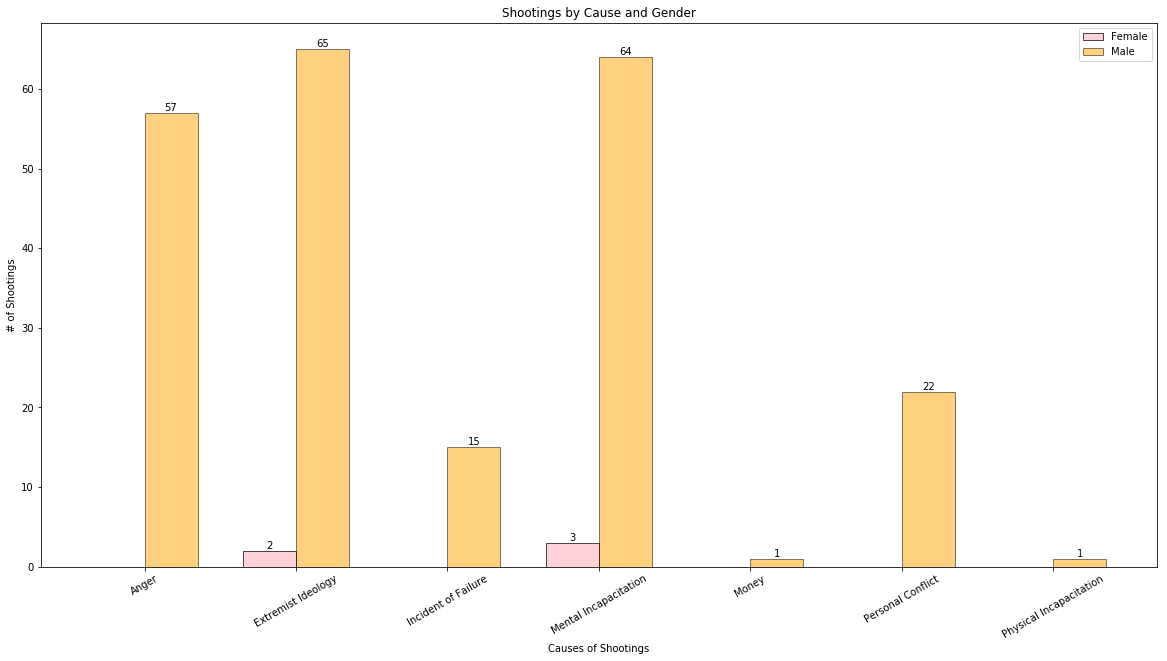

In [178]:
v2_cleaned_genders = df[df['Gender'] != 'M/F']
v2_cleaned_genders = v2_cleaned_genders[v2_cleaned_genders['Gender'] != 'Unknown']
v2_cleaned_genders = df[pd.notnull(df['Cause'])]
v2_cleaned_genders = v2_cleaned_genders[v2_cleaned_genders['Cause'] != 'Unknown']

females = v2_cleaned_genders[v2_cleaned_genders['Gender'] == 'F']
males = v2_cleaned_genders[v2_cleaned_genders['Gender'] == 'M']

females_and_causes = females.groupby('Cause').count()
males_and_causes = males.groupby('Cause').count()

female_unique_causes = females['Cause'].unique()
male_unique_causes = males['Cause'].unique()

all_gender_causes = np.unique(np.concatenate((male_unique_causes, female_unique_causes), axis=0))

def get_gender_val(x, breakdown):
    return breakdown['Gender'][x] if x in breakdown['Gender'] else 0

fig, ax = plt.subplots(figsize=(20,10))
ind = np.arange(len(all_gender_causes))
width = 0.35
female_vals = [get_gender_val(x, females_and_causes) for x in all_gender_causes]
female_rects = ax.bar(ind, female_vals, width, edgecolor = 'black', linewidth = 1, color='pink', alpha = 0.7)

male_vals = [get_gender_val(x, males_and_causes) for x in all_gender_causes]
male_rects = ax.bar(ind + width, male_vals, width, edgecolor = 'black', linewidth = 1, color='orange', alpha = 0.5)

ax.set_xlabel('Causes of Shootings')
ax.set_ylabel('# of Shootings')
ax.set_title('Shootings by Cause and Gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(all_gender_causes)

ax.legend((female_rects[0], male_rects[0]), ('Female', 'Male'))

label_bars(female_rects)
label_bars(male_rects)

plt.xticks(rotation=30)
plt.show()

## Why do shooters of different races commit mass shootings?

### ***All four races' shooters had extremist ideology and mental incapacitation within the top 3 (if not the top 2) reasons for committing a mass shooting. White and black shooters were also motivated by anger.***

### ***There was a single white shooter who was physically incapacitated (i.e. drunk), and a single Asian shooter who was motivated by money (i.e. a robbery).***

### ***White shooters dominated every cause category, except for Personal Conflict.***

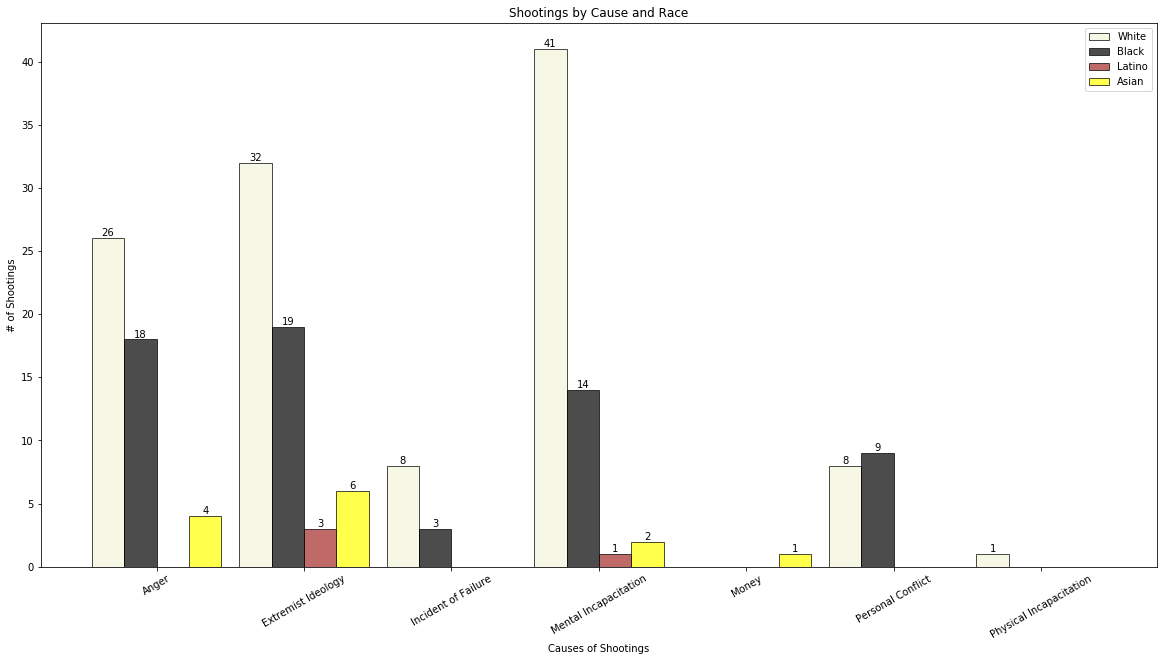

In [179]:
races_without_nans = df[pd.notnull(df['Race'])]
races_without_nans = races_without_nans[races_without_nans['Race'] != 'Unknown']
races_without_nans = races_without_nans[races_without_nans['Race'] != 'Biracial']

no_nan_races_or_causes = races_without_nans[pd.notnull(races_without_nans['Cause'])]
no_nan_races_or_causes = no_nan_races_or_causes[no_nan_races_or_causes['Cause'] != 'Unknown']
no_nan_races_or_causes

whites = no_nan_races_or_causes[no_nan_races_or_causes['Race'] == 'White']
blacks = no_nan_races_or_causes[no_nan_races_or_causes['Race'] == 'Black']
latinos = no_nan_races_or_causes[no_nan_races_or_causes['Race'] == 'Latino']
asians = no_nan_races_or_causes[no_nan_races_or_causes['Race'] == 'Asian']

whites_and_causes = whites.groupby('Cause').count()
blacks_and_causes = blacks.groupby('Cause').count()
latinos_and_causes = latinos.groupby('Cause').count()
asians_and_causes = asians.groupby('Cause').count()

white_unique_causes = whites['Cause'].unique()
black_unique_causes = blacks['Cause'].unique()
latino_unique_causes = latinos['Cause'].unique()
asian_unique_causes = asians['Cause'].unique()

all_race_causes = np.unique(np.concatenate((white_unique_causes, black_unique_causes, latino_unique_causes, asian_unique_causes), axis=0))

def get_race_val(x, breakdown):
    return breakdown['Race'][x] if x in breakdown['Race'] else 0

fig, ax = plt.subplots(figsize=(20,10))
ind = np.arange(len(all_race_causes))
width = 0.22

white_vals = [get_gender_val(x, whites_and_causes) for x in all_race_causes]
white_rects = ax.bar(ind - width, white_vals, width, edgecolor='black', linewidth=1, color='beige', alpha = 0.7)

black_vals = [get_gender_val(x, blacks_and_causes) for x in all_race_causes]
black_rects = ax.bar(ind, black_vals, width, edgecolor='black', linewidth=1, color='black', alpha = 0.7)

latino_vals = [get_gender_val(x, latinos_and_causes) for x in all_race_causes]
latino_rects = ax.bar(ind + width, latino_vals, width, edgecolor='black', linewidth=1, color='brown', alpha = 0.7)

asian_vals = [get_gender_val(x, asians_and_causes) for x in all_race_causes]
asian_rects = ax.bar(ind + width + width, asian_vals, width, edgecolor='black', linewidth=1, color='yellow', alpha = 0.7)

ax.set_xlabel('Causes of Shootings')
ax.set_ylabel('# of Shootings')
ax.set_title('Shootings by Cause and Race')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(all_race_causes)

ax.legend((white_rects[0], black_rects[0], latino_rects[0], asian_rects[0]), ('White', 'Black', 'Latino', 'Asian'))

label_bars(white_rects)
label_bars(black_rects)
label_bars(latino_rects)
label_bars(asian_rects)

plt.xticks(rotation=30)
plt.show()

# Future Research

* I'd like to be able to create a heat map using the latitude and longitude of each shooting's location to answer the question "Where do mass shootings most often occur?"

    To do this, I would have to learn how to find an accepted map tile or mapping library to accomplish this – perhaps from an API somewhere– or learn how to use a custom image and configure accordingly. I would also have to learn how to position data points appropriately on that image given its scale and each data point's latitude and longitude (i.e. x and y coordinates).
    

* I'd also like to be able to display a series of Venn Diagrams that answer the question "For each category of mass shooting cause, what proportion of them were committed by [insert race here] / [insert mental health issue here] people?"

    To do this, I would have to learn what `matplotlib` method to use (or find a different library that would allow me to do this). I would also have to learn how to format the data to be compatible with this method / library.
    
    
* Pull in another dataset that contains information about the US population (by gender, race, age) to see if the numerical differences in this report are as significant as they seem at face value.